In [62]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv("Indian automoble buying behavour study 1.0.csv")

In [64]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [65]:
df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [66]:
df.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [67]:
# renaming the column/features
df.rename(columns={'Personal loan':'Car_Loan'},inplace=True)
df.rename(columns={'Price':'EV_Price'},inplace=True)
df.rename(columns={'House Loan':'House_Loan'},inplace=True)
df.rename(columns={'Wife Working':'Wife_Working'},inplace=True)
df.drop(columns={'Make'},inplace=True)

df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,House_Loan,Wife_Working,Salary,Wife Salary,Total Salary,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,1600000


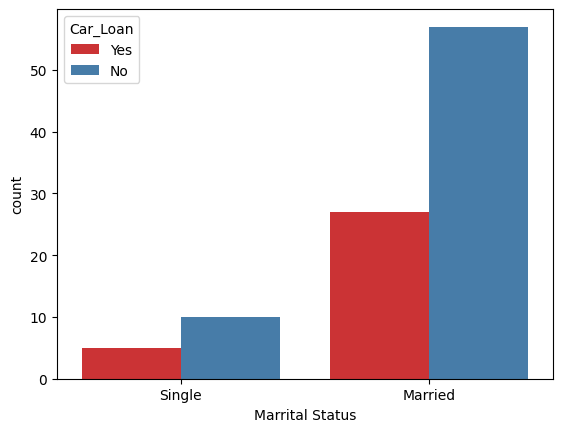

In [68]:
# Plotting the Car loan status with respect to Marrital Status
sns.countplot(x ='Marrital Status', hue = 'Car_Loan',  data = df, palette = 'Set1')
plt.show()

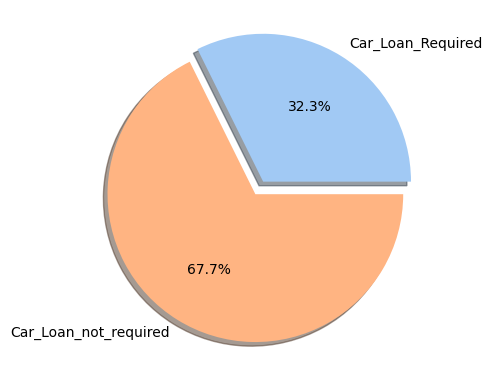

In [69]:
# visualize that how many required car_loan
#Getting labels and data
labels = ['Car_Loan_Required','Car_Loan_not_required']
Loan_status = [df.query('Car_Loan == "Yes"').Car_Loan.count(),df.query('Car_Loan == "No"').Car_Loan.count()]

# declaring exploding pie
explode = [0.1, 0]

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')
  
# plotting data on chart
plt.pie(Loan_status, labels=labels, colors=palette_color, shadow = "True",
        explode=explode, autopct='%1.1f%%')
  
# displaying chart
plt.show()

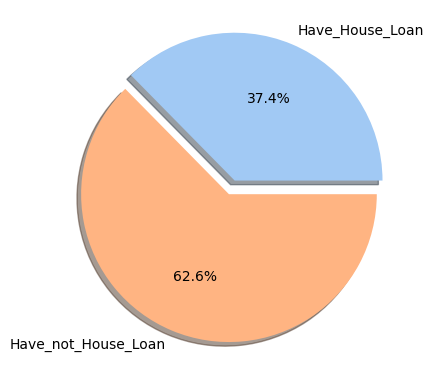

In [70]:
# visualize that how many have house_loan
#Getting labels and data
labels = ['Have_House_Loan','Have_not_House_Loan']
Loan_status = [df.query('House_Loan == "Yes"').House_Loan.count(),df.query('House_Loan == "No"').House_Loan.count()]

# declaring exploding pie
explode = [0.1, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')
  
# plotting data on chart
plt.pie(Loan_status, labels=labels, colors=palette_color, shadow = "True",
        explode=explode, autopct='%1.1f%%')
  
# displaying chart
plt.show()

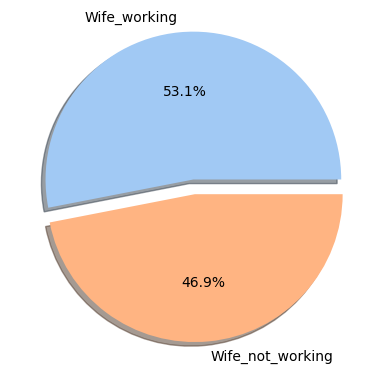

In [71]:
# visualize that how many wifes are working
#Getting labels and data
labels = ['Wife_working','Wife_not_working']
Loan_status = [df.query('Wife_Working == "Yes"').Wife_Working.count(),df.query('Wife_Working == "No"').Wife_Working.count()]

# declaring exploding pie
explode = [0.1, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')
  
# plotting data on chart
plt.pie(Loan_status, labels=labels, colors=palette_color, shadow = "True",
        explode=explode, autopct='%1.1f%%')
  
# displaying chart
plt.show()

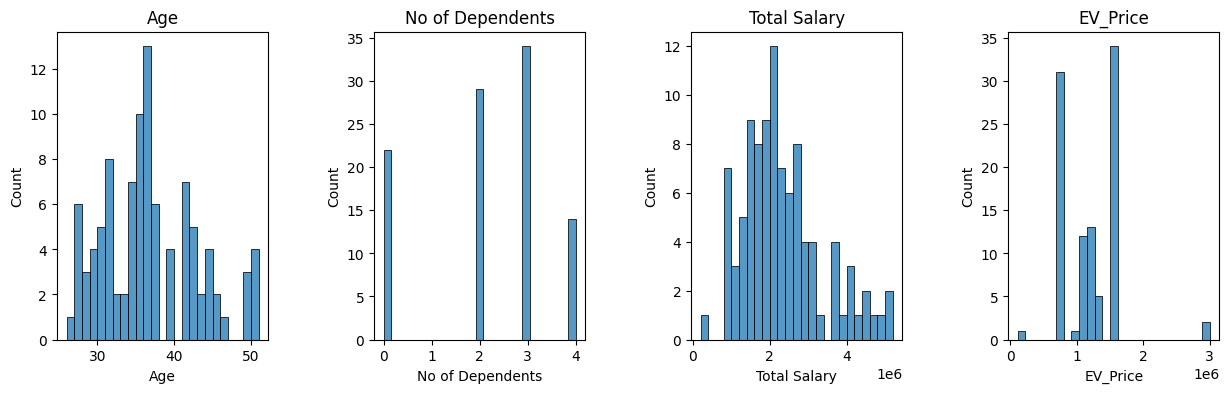

In [72]:
# Plotting the fequency of each entry for consumer features - Age, No. 0f Dependents, Total Salary, EV_Price
plt.figure(1, figsize=(15,4))
n=0

for x in ['Age', 'No of Dependents' ,'Total Salary'  ,'EV_Price']:
  n += 1
  plt.subplot(1,4,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.histplot(df[x], bins= 25)
  plt.title(f'{x}')
plt.show()

In [73]:
from kmodes.kprototypes import KPrototypes
# Kmodes is similar to K means clustering when computing distance for continuous data using mean but for categorical data it uses the mode
# Frequency based dissimilarity measure
# Hence it is more preferrable for clustering multiple datatypes

In [74]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,House_Loan,Wife_Working,Salary,Wife Salary,Total Salary,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,1600000


In [75]:
clusterFeatures = list(df.columns)
clusterData = df[clusterFeatures].values

In [76]:
clusterData[:, 0] #Age

array([27, 35, 45, 41, 31, 28, 31, 33, 34, 34, 35, 35, 29, 30, 31, 49, 26,
       27, 29, 30, 37, 35, 36, 35, 35, 35, 35, 36, 36, 36, 41, 41, 41, 43,
       42, 42, 29, 30, 30, 31, 31, 32, 32, 34, 34, 34, 36, 36, 36, 36, 49,
       49, 44, 44, 41, 41, 41, 27, 27, 28, 28, 30, 31, 31, 31, 39, 39, 39,
       39, 37, 37, 37, 37, 35, 36, 36, 36, 36, 44, 45, 46, 44, 43, 42, 42,
       42, 29, 33, 34, 34, 35, 36, 37, 27, 27, 50, 51, 51, 51],
      dtype=object)

In [77]:
clusterData[:, 0] = clusterData[:, 0].astype(float)
clusterData[:, 4] = clusterData[:, 4].astype(float)
clusterData[:, 10] = clusterData[:, 10].astype(float)
clusterData[:, 11] = clusterData[:, 11].astype(float)

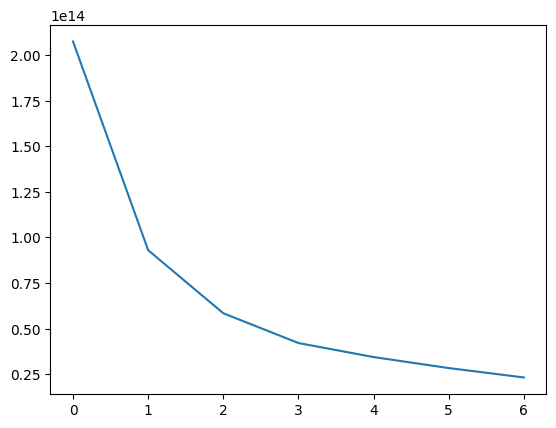

In [78]:
# Finding optimal number of clusters for KPrototypes

cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(clusterData, categorical=[1,2,3,5,6,7])
    cost.append(kproto.cost_)

plt.plot(cost)

In [79]:
cost

[207372005537143.4,
 93012295895480.9,
 58467431993963.75,
 42146531790754.46,
 34462414979816.438,
 28438875543298.54,
 23284759938578.79]

In [80]:
kproto = KPrototypes(n_clusters=2, verbose=2,max_iter=20)
clusters = kproto.fit_predict(clusterData, categorical=[1,2,3,5,6,7])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 19, ncost: 93414639752551.92
Run: 1, iteration: 2/20, moves: 3, ncost: 93026026277212.48
Run: 1, iteration: 3/20, moves: 0, ncost: 93026026277212.48
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 18, ncost: 101835475243820.25
Run: 2, iteration: 2/20, moves: 12, ncost: 95324551746559.45
Run: 2, iteration: 3/20, moves: 5, ncost: 93969304468283.98
Run: 2, iteration: 4/20, moves: 4, ncost: 93221339361208.44
Run: 2, iteration: 5/20, moves: 2, ncost: 93026026277212.48
Run: 2, iteration: 6/20, moves: 0, ncost: 93026026277212.48
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 25, ncost: 95693081221022.95
Run: 3, iteration: 2/20, moves: 6, ncost: 93969304468283.98
Run: 3, iteration: 

In [81]:
df['Cluster'] = clusters

In [82]:
# Average cost of the EV
df.EV_Price.mean()

1194040.4040404041

In [83]:
# Average cost of a car in segment 1 
df.EV_Price[df.Cluster==0].mean()

1640000.0

In [84]:
df['EV_Price'][df.Cluster==0].max()

3000000

In [85]:
# Average cost of a car in segment 2
df.EV_Price[df.Cluster==1].mean()

1043378.3783783783

In [86]:
df['EV_Price'][df.Cluster==1].max()

1600000

In [87]:
df['Cluster'].value_counts(normalize=True) * 100

Cluster
1    74.747475
0    25.252525
Name: proportion, dtype: float64

In [88]:
# Segregrating each cluster

Cluster_0 = df[df.Cluster==0]
Cluster_1 = df[df.Cluster==1]

In [89]:
df['Cluster'].value_counts()

Cluster
1    74
0    25
Name: count, dtype: int64

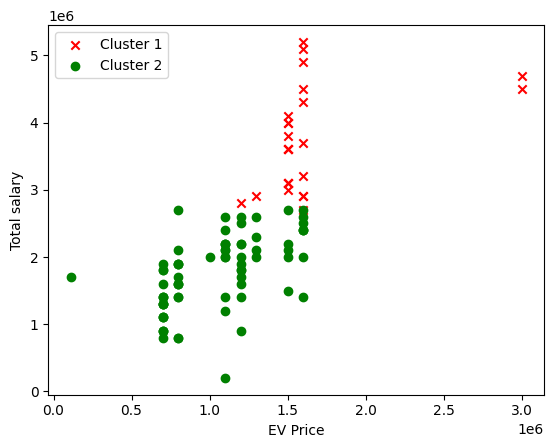

In [90]:
# plotting the effct of salary and ev price on cluster data

plt.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],color='green', label = 'Cluster 2')
plt.legend(loc="upper left")

plt.xlabel('EV Price')
plt.ylabel('Total salary')
plt.show()

# there is a clear difference in segments when comparing salary and the price of EV purchased

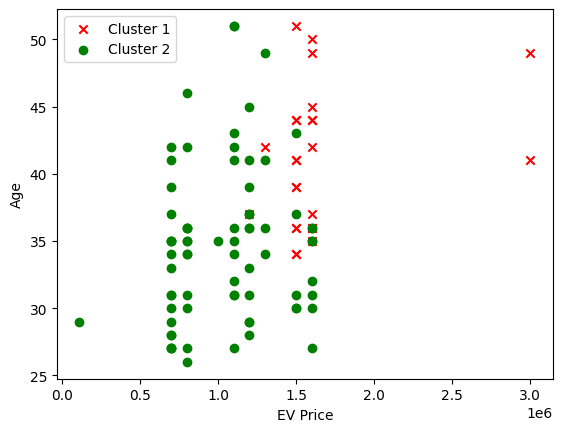

In [91]:
plt.scatter(Cluster_0.EV_Price, Cluster_0['Age'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Age'],color='green', label = 'Cluster 2')
plt.legend(loc = "upper left")

plt.xlabel('EV Price')
plt.ylabel('Age')
plt.show()

In [92]:
from mpl_toolkits.mplot3d import Axes3D
# to see the clear cluster in 3d

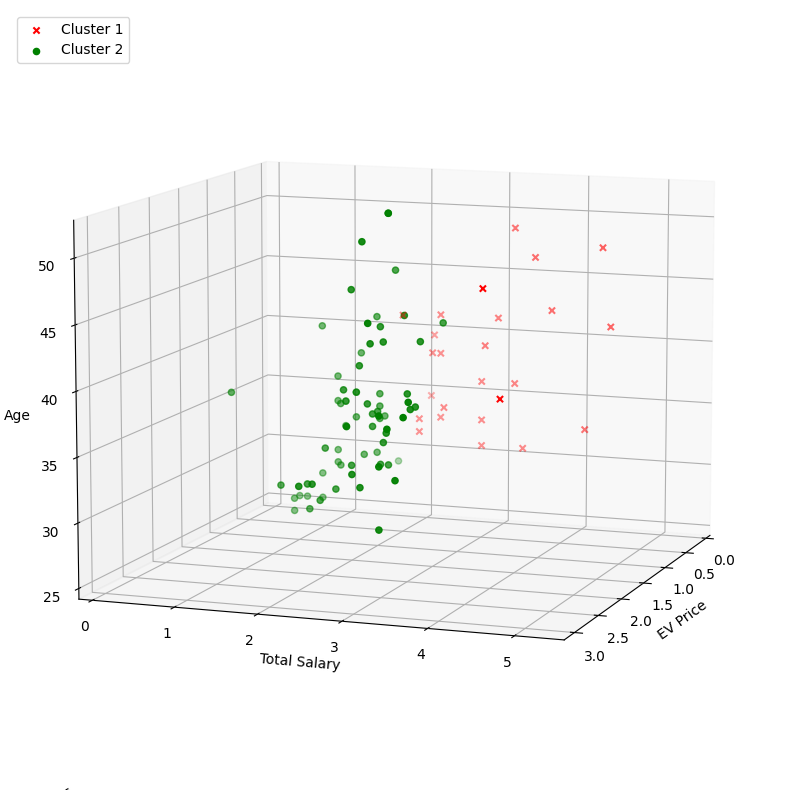

In [102]:
# plotting influence of age 

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'], Cluster_0['Age'], color='red', marker = 'x', label = 'Cluster 1')
ax.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],Cluster_1['Age'], color='green', label = 'Cluster 2')
plt.legend(loc = 'upper left')

ax.view_init(10, 20)

plt.xlabel("EV Price")
plt.ylabel("Total Salary")
ax.set_zlabel('Age')
plt.show()

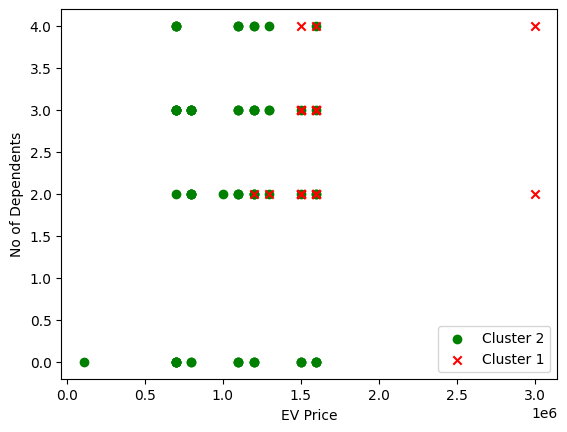

In [104]:
# plotting the effct of no of dependents and ev price on cluster data

plt.scatter(Cluster_1.EV_Price, Cluster_1['No of Dependents'],color='green', label = 'Cluster 2')
plt.scatter(Cluster_0.EV_Price, Cluster_0['No of Dependents'],color='red', marker = 'x', label = 'Cluster 1')
plt.legend(loc="lower right")

plt.xlabel('EV Price')
plt.ylabel('No of Dependents')
plt.show()

# there is a clear difference in segments when comparing salary and the price of EV purchased

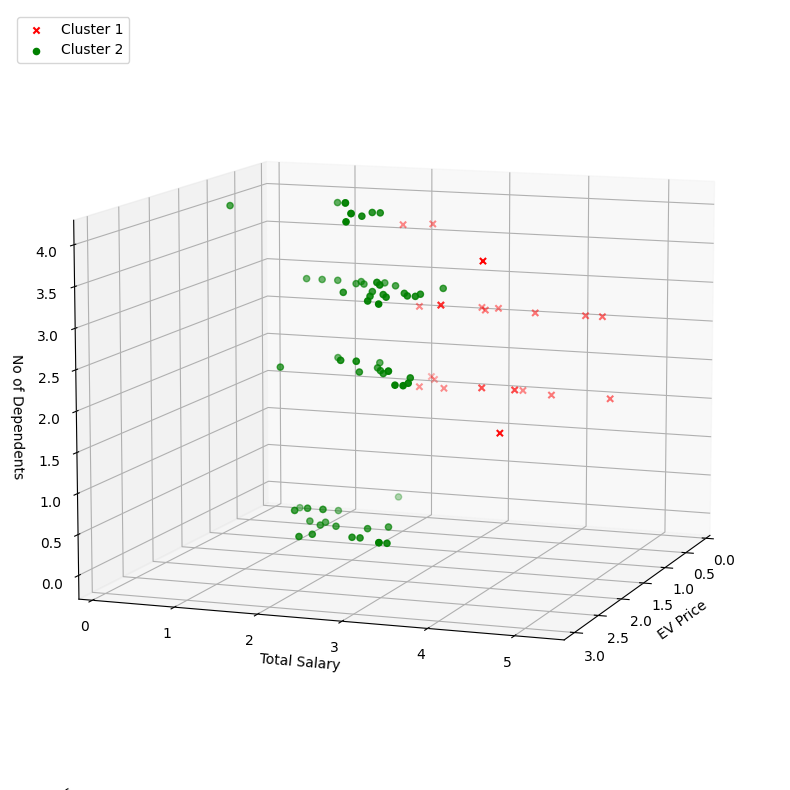

In [103]:
# plotting influence of No of Dependents

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'], Cluster_0['No of Dependents'], color='red', marker = 'x', label = 'Cluster 1')
ax.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],Cluster_1['No of Dependents'], color='green', label = 'Cluster 2')
plt.legend(loc = 'upper left')
ax.view_init(10,20)

plt.xlabel("EV Price")
plt.ylabel("Total Salary")
ax.set_zlabel('No of Dependents')
plt.show()